# Hello Turing Group!

<img src="https://www.sciencesource.com/Doc/TR7/9/9/f/0/SS21927158.jpg?d63690353549">



## **Welcome To USAIS's workshop on Bivariable Linear Regression!** 🤖📈

Below you will find all necessary instructions and tutorials to learn how to apply the theory you have learned in the workshop!

<img src="https://images.adsttc.com/media/images/5ecd/d4ac/b357/65c6/7300/009d/large_jpg/02C.jpg?1590547607">


### Prompt:

*Suppose we are selling a house in Oregon and we
want to investigate how its price behaves depending on some variables. Let these be the number of available beedrooms and the area covered (in square feet) by the house.*
<br>
<br>

Then, our values are <br>

*xᵢ =* Bedrooms available <br>
*xⱼ =* House's square footage <br>
*y =* House's price <br>


### The Goal:

<font color="lightblue">
Our goal is to **find a line of best fit** that can allow us to predict our house's price depending on the square footage and the number of bedrooms.
<br>
<br>
The line of best fit will use the following **linear equation**

$ y = θ_k x_1 + θ_j x_2 + θ_i $

where parameters $( \theta_i, \theta_j, \theta_k )$ are the **weights** we will
find using gradient descent
</font>

One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.
Below is a command that imports a dataset for our purpose from the USAIS' github page. Please run it.

## Setup

Let's start by importing some libraries. Libraries are tools that allow us to use new functions, commands, variables and so much more. They save us the trouble of creating everything we need from scratch.

In [ ]:
from pathlib import Path
import numpy as np
!pip install pandas==1.3.4
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

!git clone https://github.com/usais/workshops_21_22.git

fatal: destination path 'workshops_21_22' already exists and is not an empty directory.


We now need to access the data, which we will do by setting a couple variables

In [ ]:
path = '/content/workshops_21_22/2_lin_reg_multi_var/housing_data.csv' #if you're a linux user, then replace the separators ()
data2 = pd.read_csv(path, header=None, names=['size', 'bedrooms', 'price'])

## Exploring the Data

It's time to take a look at our data. The .head() method will print the first five elements of the dataset

In [ ]:
data2.head() # Running the line above returns a table with the first elements of the dataset

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


If you want to see the whole dataset use print(data2)

In [ ]:
print(data2)

    size  bedrooms   price
0   2104         3  399900
1   1600         3  329900
2   2400         3  369000
3   1416         2  232000
4   3000         4  539900
5   1985         4  299900
6   1534         3  314900
7   1427         3  198999
8   1380         3  212000
9   1494         3  242500
10  1940         4  239999
11  2000         3  347000
12  1890         3  329999
13  4478         5  699900
14  1268         3  259900
15  2300         4  449900
16  1320         2  299900
17  1236         3  199900
18  2609         4  499998
19  3031         4  599000
20  1767         3  252900
21  1888         2  255000
22  1604         3  242900
23  1962         4  259900
24  3890         3  573900
25  1100         3  249900
26  1458         3  464500
27  2526         3  469000
28  2200         3  475000
29  2637         3  299900
30  1839         2  349900
31  1000         1  169900
32  2040         4  314900
33  3137         3  579900
34  1811         4  285900
35  1437         3  249900
3

Let's also very quickly run a set of diagnostic calculations on the data. This is very easy thanks to the pandas library

In [ ]:
data2.describe()

,size,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


## Using Math

#### Normalize

By looking at the values, note that house sizes are about
1000 times the number of bedrooms.
<p> When features differ by orders of magnitude, performing feature scaling can make gradient descent converge
much more quickly.

<br>
<br>

This is done by normalizing our variables. Which means <p>

*   Subtracting the mean value of each feature from the dataset.

*   Dividing each feature by its respective "standard deviation"

In [ ]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head() #Below is an output of the normalized data

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


#### Variable Initialisation


Now, let's do some variable initiation. Remember that we are working with  

*   the square footage and number of bedrooms in a house *x*
*   the price *y*
*   our randomly generated parameters *θ* (remember that we have three of these, which we will encapsulate in a vector)
*   the learning rate α
*   Number of iterations (iters)

we are also initializing a cols variable, which returns the number of columns of the dataset







This step is a bit counterintuitive. Recall that we are working with *n* dimensional vectors (*vᵢ*, *vⱼ*, ... , *vₙ*)ᵀ where each dimension corresponds to one of our *x* values. <p>
In this case we have a bidimensional vector, which we want to represent in a threedimensional space. To do this, we add a "Ones" column, with a 1 in each row. This exploit allows each of the *x* values to exist in 3D.


Let's add a column of ones to the training set so we can use a vectorized solution to computing the cost and gradients.

In [ ]:
data2.insert(0, 'Ones', 1)

Let's take a look to make sure x (training set) and y (target variable) look correct.

In [ ]:
data2.head()

,Ones,size,bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


#### Split into Training and Validation

In [ ]:
# set x (training data) and y (target variable)
cols = data2.shape[1] #

x = data2.iloc[:,0:3] #selecting columns from 0 to 2 from table
y = data2.iloc[:,3:4] #selecting column 3 from table

Let's see what this looks like

In [ ]:
x.head()

,Ones,size,bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [ ]:
y.head()

,price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


#### Cost Function

In [ ]:
theta = np.matrix(np.array([0,0,0]))

print(theta)

[[0 0 0]]


The cost function is expecting numpy matrices so we need to convert x and y before we can use them.  We also need to initialize theta.

In [ ]:
x = np.matrix(x.values)
y = np.matrix(y.values)

Taking a look at the shape of our matrices, we see that θ has as as many columns as *x* does. Which is what we wanted

In [ ]:
y.shape, x.shape, theta.shape

((47, 1), (47, 3), (1, 3))

<img src="https://study.com/cimages/multimages/16/4e7cf150-0179-4d89-86f2-5cbb1f51c266_meansquarederrorformula.png">

Now let's implement linear regression using gradient descent to minimize the cost function. Recall that the cost function is an evaluation of how accurate our AI generated model is.

In [ ]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2) #Raises the subtraction between y and x*theta (transposed) to the power of two
    return np.sum(inner) / len(X) #dividing the sum by twice the length of the list

Now that we have initialized theta, we can compute our cost function of our model

In [ ]:
computeCost(x, y, theta)

0.9787234042553193

So far so good.  Now we need to define a function to perform gradient descent on the parameters theta using the update rules defined in the text.

#### Gradient Descent

Initialize some additional variables - the learning rate alpha, and the number of iterations to perform.

In [ ]:
alpha = 0.01
iters = 1000 #@param
theta = np.matrix(np.array([0,0,0]))

#X = training set
#y = validation set
#theta = weights "randomly" set to 0 at the start
#alpha = learning rate
#iters = how many time gradient descent process is repeated

def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape)) #3d matrix of zeros
    parameters = int(theta.ravel().shape[1]) #?? outputs 3
    cost = np.zeros(iters) #array to store cost for each iteration

    for i in range(iters): #repeat for every iteration
        error = (X * theta.T) - y #calulate error

        for j in range(parameters): #repeat for each weight
            term = np.multiply(error, X[:,j]) #
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term)) #

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

Now let's run the gradient descent algorithm to fit our parameters theta to the training set.

In [ ]:
g, cost = gradientDescent(x, y, theta, alpha, iters)
print (g, )

[[-1.10797896e-16  8.78503652e-01 -4.69166570e-02]]


Finally we can compute the cost (error) of the trained model using our fitted parameters.

In [ ]:
computeCost(x, y, g)

0.26140673921543783

As mentioned at the start the vector below $( \theta_i, \theta_j, \theta_k ) ^ T$ holds the parameters forming the equation $ y = θ_k x_1 + θ_j x_2 + θ_i $ for the 3D line of best fit.




In [ ]:
print (g, )

[[-1.10797896e-16  8.78503652e-01 -4.69166570e-02]]


#### Visualise Error

Looks pretty good!  Since the gradient descent function also outputs an array with the cost at each training iteration, we can plot that as well.  Notice that the cost always decreases - this is an example of a convex optimization problem.

Text(0.5, 1.0, 'Error vs Training Epoch')

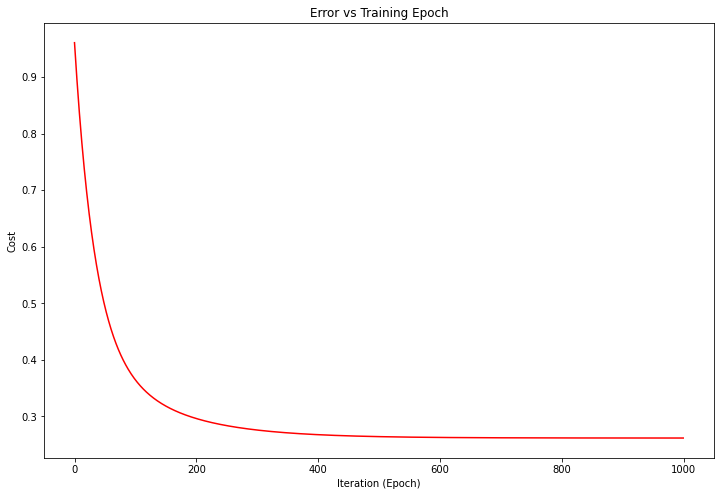

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iteration (Epoch)')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training Epoch')

#### Visualise Prediction

Lets visualise our prediction!

[[-1.10797896e-16  8.78503652e-01 -4.69166570e-02]]


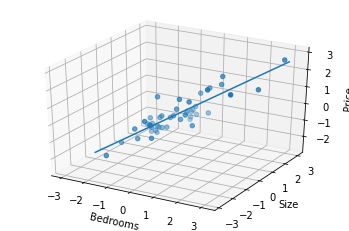

In [ ]:


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(data2['size'], data2['bedrooms'] , data2['price'] , marker='o')

line_size = np.linspace(-1,3,100)
line_bed = np.linspace(-3,3,100)

print(g)

line_price = g[0,2] * line_size + g[0,1] * line_bed + g[0,0]

ax.plot(line_bed, line_size, line_price )
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Size')
ax.set_zlabel('Price')

plt.show()

## Using Sklearn

Instead of implementing these algorithms from scratch, we could also use scikit-learn's linear regression function.  Let's apply it to our data and see what it comes up with.

#### Define and Train

In [ ]:
#define and train model

from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


LinearRegression()

#### Make a Prediction

In [ ]:
#make prediction on dummy data

input_size = 0.3 #@param
input_beds =  -0.1#@param

pred = model.predict([[1, input_size, input_beds]]) #make prediction



In [ ]:
print("Using Math: "+str(g[0]))
print("Using Scikit Learn: "+ str( [model.intercept_[0],  model.coef_[0][1],model.coef_[0][2] ]) )
print("Difference: "+ str(g[0] - [model.intercept_[0],  model.coef_[0][1],model.coef_[0][2] ]))

Using Math: [[-1.10797896e-16  8.78503652e-01 -4.69166570e-02]]
Using Scikit Learn: [-7.546297347131226e-17, 0.8847659878549522, -0.05317881966327975]
Difference: [[-3.53349222e-17 -6.26233563e-03  6.26216263e-03]]


### Visualise Predictions

Now let's plot the linear model along with the data to visually see how well it fits.

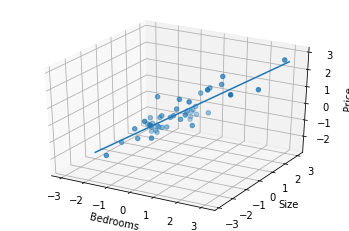

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(data2['size'], data2['bedrooms'] , data2['price'] , marker='o')

line_size = np.linspace(-1,3,100)
line_bed = np.linspace(-3,3,100)
line_price = model.coef_[0][2] * line_size + model.coef_[0][1] * line_bed + model.intercept_[0]

ax.plot(line_bed, line_size, line_price )
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Size')
ax.set_zlabel('Price')

plt.show()